In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

In [26]:
#Clean data

# 2019 broadband data file
broad_2019 = pd.read_csv("input/broadband_data_2019November.csv")
# Clean the data set by dropping rows with missing values
broad_2019[' BROADBAND USAGE '] = pd.to_numeric(broad_2019[' BROADBAND USAGE '], errors='coerce')
broad_2019[' BROADBAND AVAILABILITY PER FCC '] = pd.to_numeric(
    broad_2019[' BROADBAND AVAILABILITY PER FCC '], errors='coerce')
nan_value = float("NaN")
broad_2019.replace("-", nan_value, inplace = True)
broad_2019.dropna(subset = [' BROADBAND USAGE '], inplace = True)
broad_2019.dropna(subset = [' BROADBAND AVAILABILITY PER FCC '], inplace = True)
#broad_2019 = broad_2019.sort_values(by = [' BROADBAND AVAILABILITY PER FCC '])

# 2020 broadband data file
broad_2020 = pd.read_csv("input/broadband_data_2020October.csv")
# Clean the data by dropping rows with missing values
broad_2020[' BROADBAND USAGE '] = pd.to_numeric(broad_2020[' BROADBAND USAGE '], errors='coerce')
broad_2020[' BROADBAND AVAILABILITY PER FCC '] = pd.to_numeric(
    broad_2020[' BROADBAND AVAILABILITY PER FCC '], errors='coerce')
broad_2020.replace("-", nan_value, inplace = True)
broad_2020.dropna(subset = [' BROADBAND USAGE '], inplace = True)
broad_2020.dropna(subset = [' BROADBAND AVAILABILITY PER FCC '], inplace = True)
#broad_2020 = broad_2020.sort_values(by = [' BROADBAND AVAILABILITY PER FCC '])

regions = pd.read_csv("input/regions_by_state.csv")

# broadband challenge file
#broad_challenge = pd.read_csv("./input/broadband_data_opendatachallenge.csv")

# broadband by zip code
broad_zip = pd.read_csv("input/broadband_data_zipcode.csv")

([<matplotlib.axis.XTick at 0x7fd27e7824c0>,
 [Text(1, 0, '2019'), Text(2, 0, '2020')])

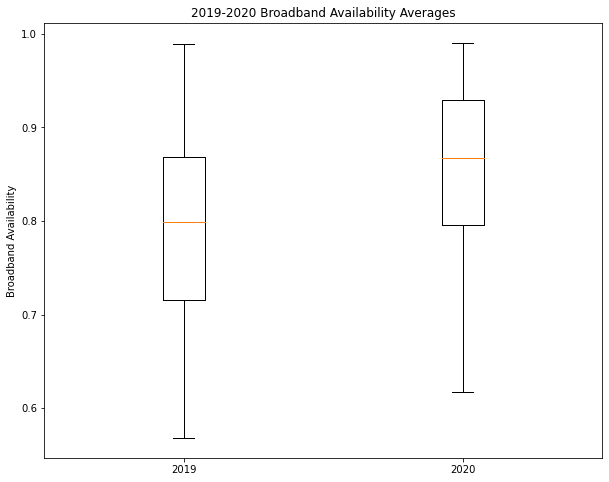

In [27]:
#Plot boxplots of Broadband Availability Averages for 2019 and 2020
#The broadband availability of each state (average of all the counties) represents one point in the plot.
#The overall national availability can thus be depicted here.

#set up windows, axis titles, chart title
plt.rcParams['figure.figsize'] = [10, 8]
plt.ylabel('Broadband Availability')
plt.title('2019-2020 Broadband Availability Averages')

#get unique states (should be 51 including DC)
states = broad_2019['ST'].unique()
#init availiability means
availMeans2019 = []

#get each state in 2019 Broadband Availability by FCC
for s in states :
    uniqueState = broad_2019.loc[broad_2019['ST'] == s]
    #calculate mean of all the counties in that state
    availMeans2019.append(uniqueState[' BROADBAND AVAILABILITY PER FCC '].mean())
    
#do similar for 2020
states = broad_2020['ST'].unique()
availMeans2020 = []
for s in states :
    uniqueState = broad_2020.loc[broad_2020['ST'] == s]
    availMeans2020.append(uniqueState[' BROADBAND AVAILABILITY PER FCC '].mean())

#Boxplot of state availability means by year
plt.boxplot([availMeans2019, availMeans2020])
#Label x axis
plt.xticks([1, 2], ['2019', '2020'])

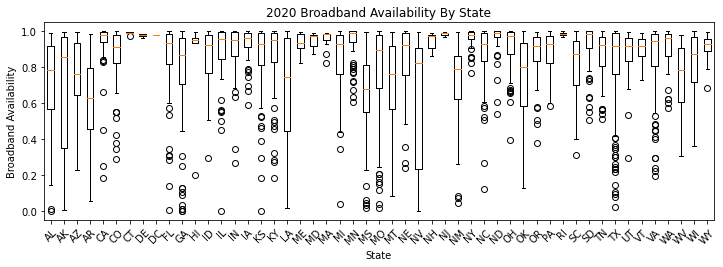

In [31]:
#Plot boxplots of 2020 Broadband Availability Averages per state
#The broadband availability of a county represents one point of data in a boxplot that represents the state.

#set up plot window
plt.rcParams['figure.figsize'] = [12, 8]
plt.subplot(2,1,1)
plt.xlabel('State')
plt.ylabel('Broadband Availability')
plt.title('2020 Broadband Availability By State')

#get unique states
states = broad_2020['ST'].unique()
#init array that contains arrays of all the county availabilities for state
stateAvails = []
#init array of means for each state (average of all counties in that state)
stateAvailMeans = []

#store data in array
#stateAvails stores each county in state s
for s in states :
    #get the array of availability of all rows with state s
    stateAvails.append(broad_2020[' BROADBAND AVAILABILITY PER FCC '].loc[(broad_2020['ST'] == s)])
    stateRegion = regions['Region'].loc[(regions['ST'] == s)]
    stateAvailMeans.append([s, stateAvails[-1].mean(), stateRegion])

#plot the data
plt.boxplot(stateAvails)
x = np.linspace(1,51, 51)
plt.xticks(x, states, rotation=45)
plt.show()

[['AR', 0.6169093333333333, 2    Southeast
Name: Region, dtype: object], ['NV', 0.6440117647058825, 33    Mountain
Name: Region, dtype: object], ['MS', 0.6447536585365855, 25    Southeast
Name: Region, dtype: object], ['AK', 0.6560666666666667, 0    None
Name: Region, dtype: object], ['LA', 0.6841249999999999, 18    Southeast
Name: Region, dtype: object], ['NM', 0.7015484848484849, 32    Southwest
Name: Region, dtype: object], ['AL', 0.7036417910447762, 1    Southeast
Name: Region, dtype: object], ['MT', 0.724925, 26    Mountain
Name: Region, dtype: object], ['WV', 0.7373018181818182, 49    Mid-Atlantic
Name: Region, dtype: object], ['AZ', 0.7492533333333334, 3    Mountain
Name: Region, dtype: object], ['OK', 0.7517051948051944, 36    Southwest
Name: Region, dtype: object], ['GA', 0.7872157232704403, 10    Southeast
Name: Region, dtype: object], ['MO', 0.7894373913043476, 24    Midwest
Name: Region, dtype: object], ['SC', 0.8027282608695652, 40    Southeast
Name: Region, dtype: object]

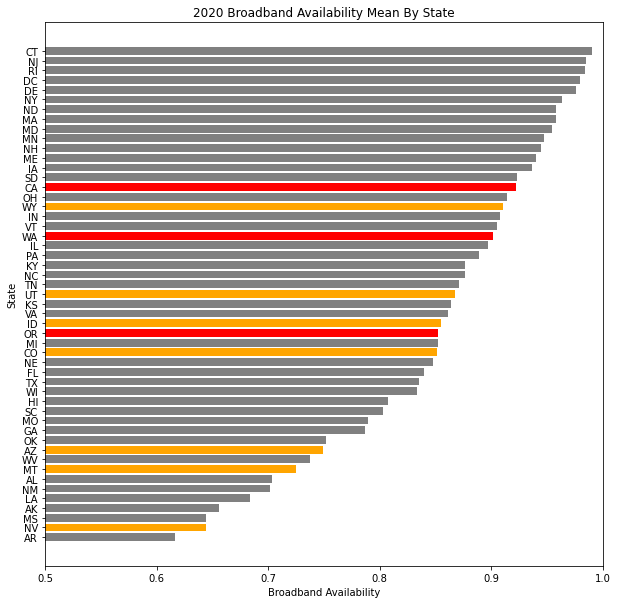

In [19]:
#Plot bargraphs of 2020 Broadband Availability means per state

#set up plot window
plt.rcParams['figure.figsize'] = [10, 10]
plt.xlabel('Broadband Availability')
plt.ylabel('State')
plt.title('2020 Broadband Availability Mean By State')
plt.xlim(.5,1)

#sort the data by availability
stateAvailMeans.sort(key=lambda a: a[1])
print(stateAvailMeans)
for s in stateAvailMeans :
    #color by region, red = bottom left and blue = top right
    r = str(s[2])
    if(r.find("Pacific") != -1) :
        clr = "red"
    elif(r.find("Mountain") != -1) :
        clr = "orange"
    elif(r.find("North Central") != -1) :
        clr = "gold"
    elif(r.find("South Central") != -1) :
        clr = "green"
    elif(r.find("South Atlantic") != -1) :
        clr = "skyblue"
    elif(r.find("Middle Atlantic") != -1) :
        clr = "blue"
    elif(r.find("New England") != -1) :
        clr = "indigo"
    else :
        clr = "gray"
        
    #plot the data
    plt.barh(s[0], s[1], color=clr)


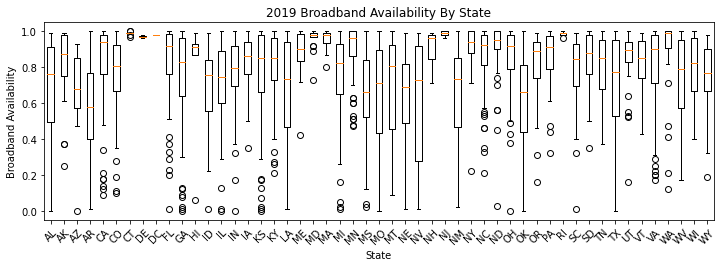

In [20]:
#Plot boxplots of 2019 Broadband Availability Averages per state
#The broadband availability of a county represents one point of data in a boxplot that represents the state.

#set up plot window
plt.rcParams['figure.figsize'] = [12, 8]
plt.subplot(2,1,1)
plt.xlabel('State')
plt.ylabel('Broadband Availability')
plt.title('2019 Broadband Availability By State')

#get unique states
states = broad_2019['ST'].unique()
#init array that contains arrays of all the county availabilities for state
stateAvails = []
#init array of means for each state (average of all counties in that state)
stateAvailMeans = []

#store data in array
#stateAvails stores each county in state s
for s in states :
    stateAvails.append(broad_2019[' BROADBAND AVAILABILITY PER FCC '].loc[(broad_2019['ST'] == s)])
    stateRegion = regions['Region'].loc[(regions['ST'] == s)]
    stateAvailMeans.append([s, stateAvails[-1].mean(), stateRegion])

#plot the data
plt.boxplot(stateAvails)
x = np.linspace(1,51, 51)
plt.xticks(x, states, rotation=45)
plt.show()

[['AR', 0.5681333333333332, 2    Southeast
Name: Region, dtype: object], ['OK', 0.6159210526315791, 36    Southwest
Name: Region, dtype: object], ['NV', 0.6241176470588236, 33    Mountain
Name: Region, dtype: object], ['NE', 0.6340860215053765, 29    Midwest
Name: Region, dtype: object], ['NM', 0.6349999999999998, 32    Southwest
Name: Region, dtype: object], ['MS', 0.6459756097560974, 25    Southeast
Name: Region, dtype: object], ['MO', 0.6618260869565216, 24    Midwest
Name: Region, dtype: object], ['AZ', 0.6673333333333332, 3    Mountain
Name: Region, dtype: object], ['AL', 0.6721212121212121, 1    Southeast
Name: Region, dtype: object], ['ID', 0.6773809523809523, 13    Mountain
Name: Region, dtype: object], ['MT', 0.6799999999999998, 26    Mountain
Name: Region, dtype: object], ['LA', 0.6800000000000002, 18    Southeast
Name: Region, dtype: object], ['TX', 0.7021370967741932, 43    Southwest
Name: Region, dtype: object], ['IL', 0.7280392156862743, 14    Midwest
Name: Region, dtype:

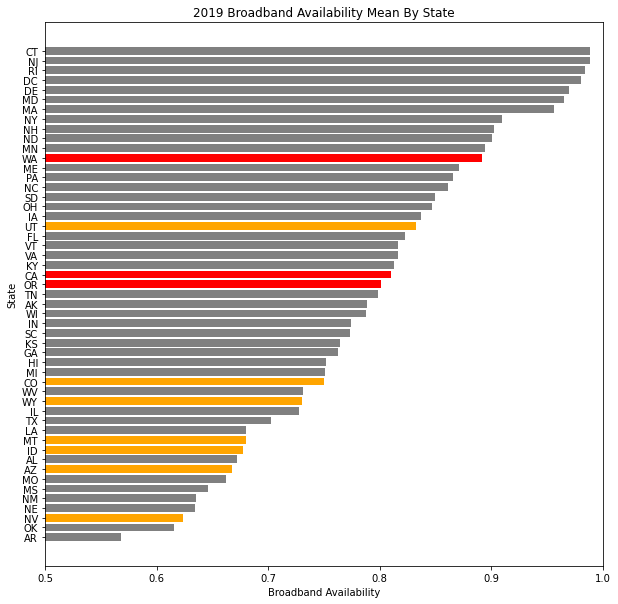

In [30]:
#Plot bargraphs of 2019 Broadband Availability means per state

#set up plot window
plt.rcParams['figure.figsize'] = [10, 10]
plt.xlabel('Broadband Availability')
plt.ylabel('State')
plt.title('2019 Broadband Availability Mean By State')
plt.xlim(.5,1)

#sort the data by availability
stateAvailMeans.sort(key=lambda a: a[1])
print(stateAvailMeans)
for s in stateAvailMeans :
    #color by region, red = bottom left and blue = top right
    r = str(s[2])
    if(r.find("Pacific") != -1) :
        clr = "red"
    elif(r.find("Mountain") != -1) :
        clr = "orange"
    elif(r.find("North Central") != -1) :
        clr = "gold"
    elif(r.find("South Central") != -1) :
        clr = "green"
    elif(r.find("South Atlantic") != -1) :
        clr = "skyblue"
    elif(r.find("Middle Atlantic") != -1) :
        clr = "blue"
    elif(r.find("New England") != -1) :
        clr = "indigo"
    else :
        clr = "gray"
        
    #plot the data
    plt.barh(s[0], s[1], color=clr)

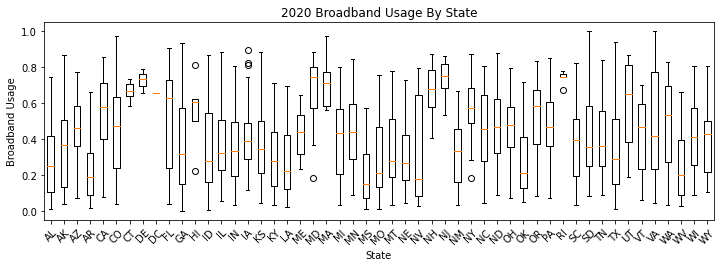

In [29]:
#Plot boxplots of 2020 Broadband Usage Averages per state
#The broadband availability of a county represents one point of data in a boxplot that represents the state.

#set up plot window
plt.rcParams['figure.figsize'] = [12, 8]
plt.subplot(2,1,1)
plt.xlabel('State')
plt.ylabel('Broadband Usage')
plt.title('2020 Broadband Usage By State')

#get unique states
states = broad_2020['ST'].unique()
#init array that contains arrays of all the county availabilities for state
stateUse = []
#init array of means for each state (average of all counties in that state)
stateUseMeans = []

#store data in array
#stateAvails stores each county in state s
for s in states :
    stateUse.append(broad_2020[' BROADBAND USAGE '].loc[(broad_2020['ST'] == s)])
    stateRegion = regions['Region'].loc[(regions['ST'] == s)]
    stateUseMeans.append([s, stateUse[-1].mean(), stateRegion])

#plot the data
plt.boxplot(stateUse)
x = np.linspace(1,51, 51)
plt.xticks(x, states, rotation=45)
plt.show()

[['MS', 0.20037804878048776, 25    Southeast
Name: Region, dtype: object], ['AR', 0.22662666666666673, 2    Southeast
Name: Region, dtype: object], ['WV', 0.2527636363636363, 49    Mid-Atlantic
Name: Region, dtype: object], ['OK', 0.27592207792207785, 36    Southwest
Name: Region, dtype: object], ['LA', 0.2840937500000001, 18    Southeast
Name: Region, dtype: object], ['AL', 0.2895970149253731, 1    Southeast
Name: Region, dtype: object], ['MO', 0.2916260869565218, 24    Midwest
Name: Region, dtype: object], ['KY', 0.3021500000000001, 17    Midwest
Name: Region, dtype: object], ['NE', 0.3096, 29    Midwest
Name: Region, dtype: object], ['NM', 0.32415151515151513, 32    Southwest
Name: Region, dtype: object], ['TX', 0.33995652173913044, 43    Southwest
Name: Region, dtype: object], ['MT', 0.3411964285714286, 26    Mountain
Name: Region, dtype: object], ['AK', 0.3511904761904763, 0    None
Name: Region, dtype: object], ['NV', 0.3543529411764706, 33    Mountain
Name: Region, dtype: object

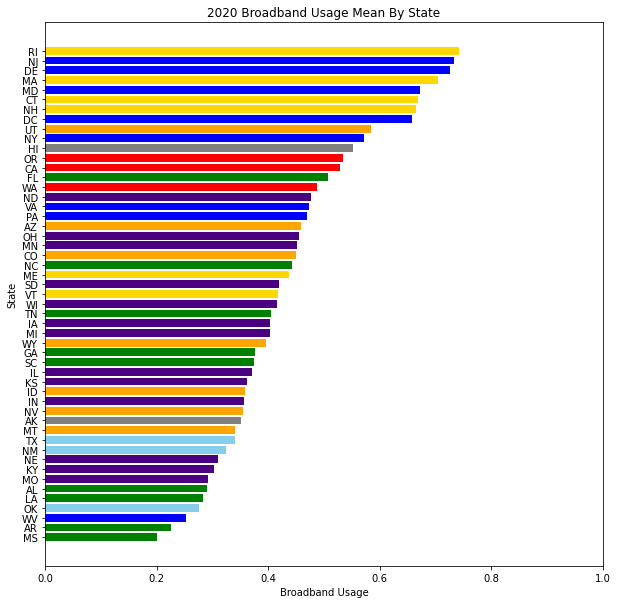

In [25]:
#Plot bargraphs of 2020 Broadband Usage means per state

#set up plot window
plt.rcParams['figure.figsize'] = [10, 10]
plt.xlabel('Broadband Usage')
plt.ylabel('State')
plt.title('2020 Broadband Usage Mean By State')
plt.xlim(0,1)

#sort the data by availability
stateUseMeans.sort(key=lambda a: a[1])
print(stateUseMeans)
for s in stateUseMeans :
    #color by region, red = bottom left and blue = top right
    r = str(s[2])
    if(r.find("Pacific") != -1) :
        clr = "red"
    elif(r.find("Mountain") != -1) :
        clr = "orange"
    elif(r.find("Northeast") != -1) :
        clr = "gold"
    elif(r.find("Southeast") != -1) :
        clr = "green"
    elif(r.find("Southwest") != -1) :
        clr = "skyblue"
    elif(r.find("Mid-Atlantic") != -1) :
        clr = "blue"
    elif(r.find("Midwest") != -1) :
        clr = "indigo"
    else :
        clr = "gray"
        
    #plot the data
    plt.barh(s[0], s[1], color=clr)

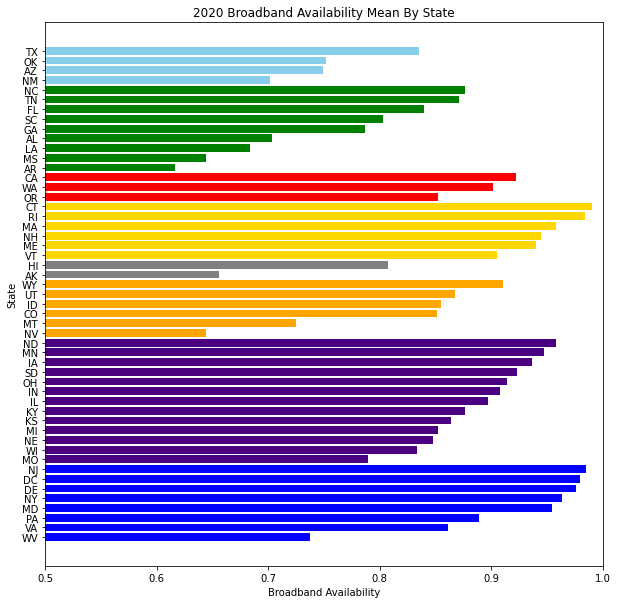

In [32]:
#Plot bargraphs of 2020 Broadband Availability means per state

#set up plot window
plt.rcParams['figure.figsize'] = [10, 10]
plt.xlabel('Broadband Availability')
plt.ylabel('State')
plt.title('2020 Broadband Availability Mean By State')
plt.xlim(.5,1)

def sortByRegion(e):
    if (str(e[2]).find("East") != -1 or str(e[2]).find("West") != -1):
        #print(str(e[2])[2:].lstrip()[4:].lstrip())
        return str(e[2])[2:].lstrip()[4:].lstrip()
    #print(str(e[2])[2:].lstrip())
    return str(e[2])[2:].lstrip()

def sortByMean(e):
    return e[1]

stateAvailMeans.sort(key=sortByMean)
stateAvailMeans.sort(key=sortByRegion)
for s in stateAvailMeans :
    #color by region, red = bottom left and blue = top right
    r = str(s[2])
    if(r.find("Pacific") != -1) :
        clr = "red"
    elif(r.find("Mountain") != -1) :
        clr = "orange"
    elif(r.find("Northeast") != -1) :
        clr = "gold"
    elif(r.find("Southeast") != -1) :
        clr = "green"
    elif(r.find("Southwest") != -1) :
        clr = "skyblue"
    elif(r.find("Mid-Atlantic") != -1) :
        clr = "blue"
    elif(r.find("Midwest") != -1) :
        clr = "indigo"
    else :
        clr = "gray"
        
    #plot the data
    plt.barh(s[0], s[1], color=clr)
plt.show()